<a href="https://colab.research.google.com/github/itsGab/previsao_uti_em_covid/blob/main/notebooks/tratamento_dos_dados_e_limpeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Previsão de Admissão por COVID-19</h1>
<h2 align='center'>Tratamento e Limpeza dos Dados</h2>

In [1]:
# Imports

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

import warnings
warnings.filterwarnings('ignore')

# Leitura inicial dos dados


In [2]:
# Importando os dados do repositório no github

dados = "https://github.com/itsGab/previsao_uti_em_covid/blob/main/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true"

In [3]:
# Abrindo o DataFrame inicial

df_inicial = pd.read_excel(dados)
df_inicial.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,



Separação de colunas por tipo do dados:

| nome da variável | descrição | 
|---|---|
| cols_comorbidades | grupos de doenças |
| cols_demograficos | faixa etária e sexo |
| cols_sinais_vitais| sinais vitais `iloc[:, 193:-2]`|
| cols_exames_lab | exames laboratoriais `iloc[:, 13:193]`| 
| cols_outros | identificador, janela e uti |

In [4]:
# Substituindo espaço por underscore (nomes colunas)

df_inicial.columns = df_inicial.columns.str.replace(' ', '_')

In [5]:
# Segregando as colunas por tipo de dado em listas

# baseado em um notebook feito pelo criador do desafio
# https://www.kaggle.com/felipeveiga/starter-covid-19-sirio-libanes-icu-admission

# sobre comorbidades
cols_comorbidades = [i for i in df_inicial.columns if "DISEASE" in i]
cols_comorbidades.extend(["HTN", "IMMUNOCOMPROMISED", "OTHER"])

# sobre informações demograficas
cols_demograficas = [i for i in df_inicial.columns if "AGE_" in i]
cols_demograficas.append("GENDER")

# sobre sinais vitais
cols_sinais_vitais = df_inicial.iloc[:,193:-2].columns.tolist()

# sobre exames laboratoriais
cols_exames_laboratoriais = df_inicial.iloc[:,13:193].columns.tolist()

# outras colunas: identificador do paciente, janela e variável alvo (ICU)
cols_outras = ["PATIENT_VISIT_IDENTIFIER", "WINDOW", "ICU"]

In [6]:
# Mostrando informações do DataFrame

df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [7]:
# Numero de PATIENT_VISIT_IDENTIFIER unicos (ou numero de pacientes unicos)
df_inicial['PATIENT_VISIT_IDENTIFIER'].nunique()

385

<h3 align='center'> Informações: </h3>

| Info | Descrição |
|--|--|
| Nº de colunas | 231 |
| Nº de linhas | 1925 | 
| Data types| ["float64(225)", "int64(4)", "object(2)"] |
| Nº de pacientes | 385 |  

In [8]:
# Estatísticas descritivas

pd.set_option('display.max_columns', None)
df_inicial.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821

# Tratamento


## Tratamento de colunas vazias (ou NaN)

### Conceitos e Ação:

1. Cuidado para NÃO usar os dados quando a variável de alvo (‘ICU’ = 1) estiver presente, pois a ordem do evento é desconhecida (talvez o evento de destino tenha acontecido antes de os resultados serem obtidos). Eles foram mantidos lá para que possamos aumentar este conjunto de dados em outros resultados posteriormente.

        Ação: Limpeza dos Pacientes que foram pra UTI na primeira janela.


2. A identificação precoce dos pacientes que desenvolverão um curso adverso da doença (e precisam de cuidados intensivos) é a chave para um tratamento adequado (salvar vidas) e para gerenciar leitos e recursos. O modelo usando apenas o primeiro (0-2) provavelmente será mais clinicamente relevante.

        Ação: Preparar a primeira janela (0-2). Marcando a variável alvo de pacientes que precisam da UTI.

3. Um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia entre os diferentes tipos de medições. Por exemplo, os sinais vitais são coletados com mais frequência (geralmente de hora em hora) do que os laboratórios de sangue (geralmente diariamente). É sensato supor que um paciente que não tem uma medição registrada em uma janela de tempo esteja clinicamente estável, podendo apresentar sinais vitais e exames de sangue semelhantes às janelas vizinhas. Portanto, pode-se preencher os valores ausentes usando a entrada seguinte ou anterior.

        Ação: Preencher valores faltantes com backfill, desconsiderando casos que já tenham entrado na UTI.

4. Atenção aos problemas de multicolinearidade e variância zero nesses dados ao escolher seu algoritmo.

        Ação: Remover as colunas com alta correlação

In [9]:
# Listando os pacientes que entraram na uti na primeira janela (0 a 2 horas)

lista_pacientes_uti_primeira_janela = df_inicial.query('WINDOW == "0-2" & ICU == 1').index.tolist()

In [10]:
# Mantendo apenas os pacientes que não estão na lista de entrada na primeira janela.

df_tratado = df_inicial.query('PATIENT_VISIT_IDENTIFIER not in @lista_pacientes_uti_primeira_janela')

In [11]:
# Definindo função para preparar primeira janela com a marcador da variável alvo.

def preparando_janela(grupo):
    if any(grupo['ICU']):
        grupo.loc[grupo['WINDOW'] == '0-2', 'ICU'] = 1
    return grupo

df_tratado = df_tratado.groupby('PATIENT_VISIT_IDENTIFIER').apply(preparando_janela)

# indentificando linhas com as janelas que sejam diferentes das primeira janela 
# e já deram entrada na UTI
index_linhas_remover = df_tratado.query('WINDOW != "0-2" & ICU == 1').index.tolist()

# removendo as linhas
df_tratado = df_tratado.drop(index=index_linhas_remover)

In [12]:
# Número de linhas sem NaN e sem o preenchimento (backfill).

n_linhas_sem_backfill = df_tratado.query('WINDOW == "0-2"').dropna().describe().loc['count', :]['PATIENT_VISIT_IDENTIFIER']

In [13]:
# Fazendo o preechimento

df_tratado.update(df_tratado.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False).fillna(method='bfill', axis=0))
df_tratado = df_tratado.query('WINDOW == "0-2"').dropna()

In [14]:
# Número de linhas sem NaN e com o preenchimento (backfill)

n_linhas_com_backfill = df_tratado.dropna().describe().loc['count', :]['PATIENT_VISIT_IDENTIFIER']

In [15]:
# Calculando as porcentagens de linhas comparado ao df_inical

n_pacientes = df_inicial['PATIENT_VISIT_IDENTIFIER'].nunique()
p1 = n_linhas_sem_backfill/n_pacientes
p2 = n_linhas_com_backfill/n_pacientes
p1, p2

(0.10909090909090909, 0.7688311688311689)

Aqui é possível notar que, caso não seja feito o preenchimento dos dados NaN com o metodo "backfill", ou seja, preencher com o próximo valor válido, na hora de descartar as colunas que ainda tenham algum NaN ficariamos com apenas 42 válidos de um total de 385. Já com todo o tratamento e o uso do "backfill" foi possível ficar com 296 pacientes válidos.

|Método de Tratamento| % de Pacientes Válidos|
|--|--|
|Sem Backfill| 10.9 % |
|Com Backfill| 76.9 %|

Depois de todo o preenchimento e tratamento, restaram 296 pacientes

## Trabalhar correlação entre colunas para remover colunas com alta correlação
Focar nas colunas de exames laboratoriais e sinais vitais (colunas com valores continuos)

In [16]:
# Juntando as colunas de exames laboratoriais com as de sinais vistais

cols_exames_e_vitais = cols_exames_laboratoriais + cols_sinais_vitais

In [17]:
# Mostrando as tendências de correlação que aparecem em colunas derivadas

df_tratado[cols_exames_e_vitais].corr().iloc[:10, :10]

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF
ALBUMIN_MEDIAN,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_MEAN,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_MIN,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_MAX,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_DIFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE_ARTERIAL_MEDIAN,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_MEAN,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_MIN,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_MAX,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_DIFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


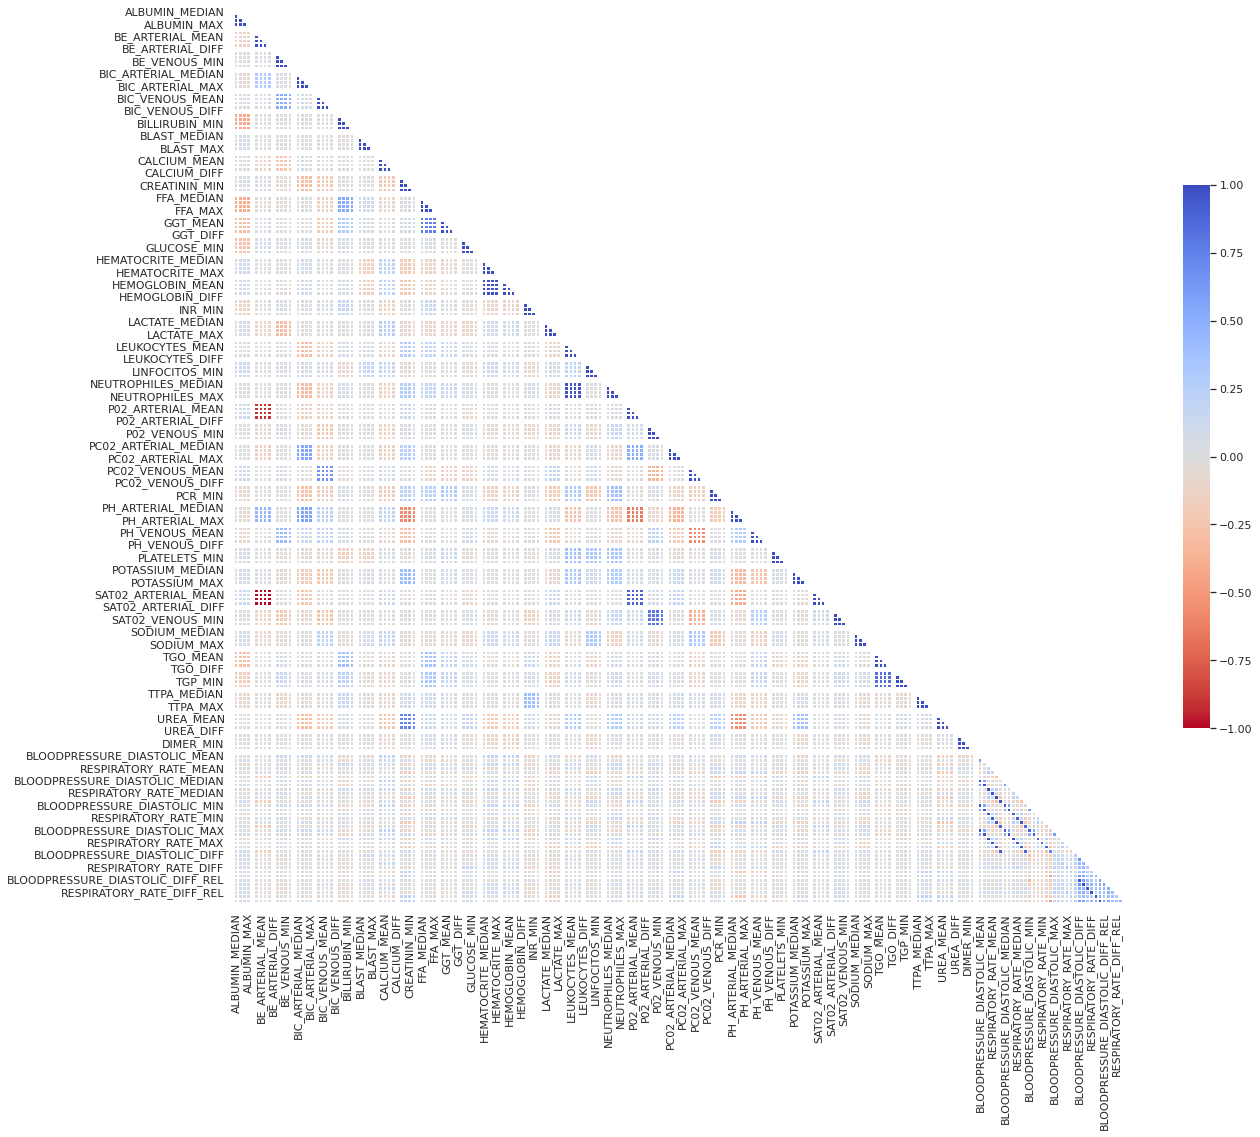

In [18]:
# Plotando MAPA DE CALOR da correlação entre colunas

# Computando a correlaçãoda matrix
matrix_corr = df_tratado[cols_exames_e_vitais].corr()

# Gerando a mascara para a parte superior do triangulo
mask = np.triu(np.ones_like(matrix_corr, dtype=bool))

# Settando paramentros e plotando o mapa de calor (heatmap)

# tamanho da figura
f, ax = plt.subplots(figsize=(20, 20))
# mapa de cores do mapa de calor
cmap = sns.color_palette("coolwarm_r", as_cmap=True)
# plot do mapa de calor
sns.heatmap(matrix_corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

No Mapa de calor acima é possível ter uma idéia do nível de correlação de algumas colunas pelas cores mais saturadas, sendo o **Azul** para correlação diretamente proporcional e o **Vermelho** para correlação inversamento proporcional. 

TAXA DE CORTE DE CORRELAÇÃO MAIOR QUE 0,90

In [19]:
# Computando a triangulo da matrix de correlação absoluta
matrix_corr_abs = matrix_corr.mask(mask).abs()

# Listando as colunas com alta correlação ou sem variancia
taxa_corte_corr = 0.90
excluir_cols = [col for col in matrix_corr_abs.columns if any(matrix_corr_abs[col]>taxa_corte_corr) or matrix_corr_abs[col].sum() == 0]

# Listando colunas exames e sinais vitais usaveis
cols_exames_e_vitais_usaveis = [col for col in cols_exames_e_vitais if col not in excluir_cols]

In [20]:
n_usaveis = len(cols_exames_e_vitais_usaveis)
n_originais = len(cols_exames_e_vitais)
diferenca = n_originais - n_usaveis
print(f'Coluna de Exames Lab. & Sinais Vitais\n'
f'No. Colunas Originais:   {n_originais}\n'
f'No. Colunas Usaveis:      {n_usaveis}\n'
f'Diferenca:               {diferenca}')

Coluna de Exames Lab. & Sinais Vitais
No. Colunas Originais:   216
No. Colunas Usaveis:      47
Diferenca:               169


In [21]:
# Selecionando colunas usaveis

# Listando todas as colunas usaveis
cols_usaveis = cols_outras + cols_demograficas + cols_comorbidades + cols_exames_e_vitais_usaveis

# Fatiando DataFrame com colunas usaveis
df_tratado_sem_corr = df_tratado[cols_usaveis]

display(df_tratado_sem_corr.shape)
display(df_tratado_sem_corr.head())

(296, 62)

,PATIENT_VISIT_IDENTIFIER,WINDOW,ICU,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MAX,BE_VENOUS_MAX,BIC_ARTERIAL_MAX,BIC_VENOUS_MAX,BILLIRUBIN_MAX,BLAST_MAX,CALCIUM_MAX,CREATININ_MAX,FFA_MAX,GGT_MAX,GLUCOSE_MAX,HEMOGLOBIN_MAX,INR_MAX,LACTATE_MAX,LINFOCITOS_MAX,NEUTROPHILES_MAX,P02_VENOUS_MAX,PC02_ARTERIAL_MAX,PC02_VENOUS_MAX,PCR_MAX,PH_ARTERIAL_MAX,PH_VENOUS_MAX,PLATELETS_MAX,POTASSIUM_MAX,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MAX,SODIUM_MAX,TGO_MAX,TGP_MAX,TTPA_MAX,UREA_MAX,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL
0,0,0-2,1,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.109756,-0.932246,1.000000,-0.914938,-0.868747,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.237113,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
10,2,0-2,1,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.158537,-0.959849,1.000000,-0.908714,-0.412965,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.525773,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000
15,3,0-2,0,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.219512,-0.959849,-0.828421,-0.836100,-0.784714,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.175258,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
20,4,0-2,0,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.304878,-0.959849,1.000000,-0.641079,-0.812725,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.443299,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536
30,6,0-2,0,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.944798,-0.742004,-0.958528,-0.891993,-0.475610,-0.959849,1.000000,-0.858921,-0.947579,-0.704142,-0.77931,-0.754601,-0.750095,0.234043,0.363636,-0.636849,-0.962963,0.939394,0.345679,-0.257143,-0.995428,-0.986662,-0.846633,-0.951807,-0.978029,-0.010309,-0.500000,0.494505,0.959596,-0.452991,-0.610811,-0.537313,-0.636364,-0.043478,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


## Verificando colunas com dtypes 'object'

In [22]:
df_tratado_sem_corr.select_dtypes('object').T

,0,10,15,20,30,35,40,45,50,55,60,65,70,75,80,95,100,105,110,115,125,130,145,150,160,165,170,175,180,185,190,195,210,215,225,230,245,250,255,280,285,290,295,300,305,310,315,325,330,335,340,350,355,360,370,375,380,390,400,405,415,430,440,445,455,460,465,470,475,480,485,490,495,505,530,535,540,550,555,560,565,570,575,590,605,610,615,620,625,630,635,640,645,650,655,660,665,670,680,685,690,700,715,730,735,750,755,760,765,770,780,785,790,795,800,810,815,820,825,830,835,840,845,850,855,860,865,870,875,885,890,895,900,905,910,915,920,925,930,935,940,945,950,960,965,970,975,980,985,990,1000,1005,1015,1020,1030,1035,1040,1045,1050,1055,1060,1065,1070,1080,1085,1090,1095,1100,1105,1110,1115,1120,1125,1130,1140,1145,1150,1155,1160,1180,1185,1190,1205,1210,1215,1220,1225,1230,1235,1240,1245,1250,1255,1265,1270,1280,1285,1290,1295,1310,1320,1330,1340,1345,1355,1360,1365,1370,1375,1380,1385,1390,1395,1400,1405,1415,1420,1425,1450,1460,1465,1470,1475,1480,1490,1495,1500,1505,1510,1515,1520,1525,1535,1540,1545,1555,1560,1565,1570,1575,1585,1590,1595,1605,1610,1615,1620,1630,1635,1640,1650,1655,1660,1665,1670,1675,1680,1685,1690,1700,1705,1715,1720,1725,1730,1740,1745,1750,1755,1760,1765,1770,1775,1780,1790,1795,1800,1805,1815,1825,1830,1840,1845,1850,1855,1865,1870,1875,1880,1885,1890,1900,1905,1910,1915,1920
WINDOW,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
AGE_PERCENTIL,60th,10th,40th,10th,70th,20th,50th,80th,80th,80th,20th,50th,60th,50th,30th,70th,40th,70th,60th,40th,90th,20th,70th,80th,30th,70th,30th,30th,70th,70th,30th,30th,50th,40th,50th,70th,90th,Above 90th,10th,50th,80th,70th,10th,20th,30th,70th,40th,20th,30th,90th,90th,80th,30th,20th,70th,60th,30th,10th,20th,70th,70th,30th,10th,20th,20th,10th,10th,60th,90th,80th,20th,30th,60th,Above 90th,70th,Above 90th,40th,10th,60th,40th,Above 90th,20th,10th,20th,10th,70th,60th,30th,70th,90th,80th,30th,20th,60th,20th,80th,50th,70th,80th,80th,Above 90th,80th,30th,40th,10th,Above 90th,Above 90th,60th,50th,40th,90th,Above 90th,40th,60th,50th,30th,70th,70th,30th,50th,20th,50th,10th,60th,20th,60th,10th,30th,30th,10th,50th,60th,90th,50th,10th,30th,50th,30th,20th,70th,30th,30th,60th,70th,90th,80th,50th,20th,10th,10th,20th,20th,Above 90th,30th,20th,30th,20th,40th,10th,50th,10th,50th,60th,10th,Above 90th,90th,Above 90th,Above 90th,10th,80th,Above 90th,60th,20th,Above 90th,20th,10th,40th,10th,60th,30th,40th,10th,80th,50th,Above 90th,60th,90th,40th,40th,50th,80th,60th,30th,10th,70th,40th,80th,20th,20th,20th,60th,50th,20th,20th,30th,60th,20th,70th,80th,50th,10th,70th,50th,20th,90th,10th,20th,90th,50th,80th,40th,90th,30th,50th,10th,30th,50th,40th,50th,40th,80th,70th,70th,80th,40th,60th,20th,60th,40th,50th,40th,50th,60th,60th,30th,40th,10th,90th,80th,10th,Above 90th,70th,80th,90th,40th,80th,10th,20th,10th,40th,30th,80th,20th,Above 90th,30th,40th,40th,30th,50th,20th,Above 90th,60th,40th,10th,70t

**Age percentil**: iremos transformar em categóricos.

**Window**: como só temos uma variação de Janela e não iremos usar ela no nosso modelo de previsão, então não há a necessidade de tratar, iremos apenas remover.


## Tratamento dos dtype objects

In [23]:
# Transformando age percentil em dados categoricos

col_age_percentil_cat = df_tratado_sem_corr['AGE_PERCENTIL'].astype('category').cat.codes
df_tratado_sem_corr['AGE_PERCENTIL_CAT'] = col_age_percentil_cat

Outro possibilidade seria usar o `pd.get_dummies()`, mas optei por usar os códigos categoricos

In [24]:
df_tratado_sem_corr[['AGE_PERCENTIL', 'AGE_PERCENTIL_CAT']].head(7)

,AGE_PERCENTIL,AGE_PERCENTIL_CAT
0,60th,5
10,10th,0
15,40th,3
20,10th,0
30,70th,6
35,20th,1
40,50th,4


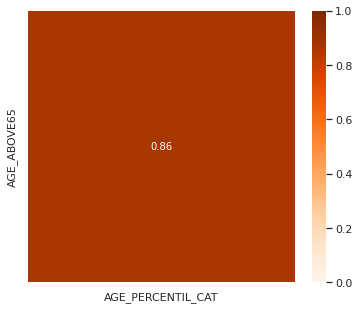

In [25]:
# Dando um olhada na correlação

matrix_temp = df_tratado_sem_corr[['AGE_PERCENTIL_CAT', 'AGE_ABOVE65']].corr()

f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(matrix_temp.loc[['AGE_ABOVE65'], ['AGE_PERCENTIL_CAT']], vmin=0, 
            vmax=1, annot=True, cmap='Oranges')
plt.show()

Talvez, com uma correlação de 0,86, seja interessante analisar se há interferência no modelo (positiva, negativo ou nao há) e qual das duas colunas faz mais sentido manter.

Como só temos um linha por index, vamos utilizar o identificador como indice (index)

In [26]:
# Usando ID como indice

df_tratado_sem_corr.set_index('PATIENT_VISIT_IDENTIFIER', inplace=True)
df_tratado_sem_corr.head()

,WINDOW,ICU,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MAX,BE_VENOUS_MAX,BIC_ARTERIAL_MAX,BIC_VENOUS_MAX,BILLIRUBIN_MAX,BLAST_MAX,CALCIUM_MAX,CREATININ_MAX,FFA_MAX,GGT_MAX,GLUCOSE_MAX,HEMOGLOBIN_MAX,INR_MAX,LACTATE_MAX,LINFOCITOS_MAX,NEUTROPHILES_MAX,P02_VENOUS_MAX,PC02_ARTERIAL_MAX,PC02_VENOUS_MAX,PCR_MAX,PH_ARTERIAL_MAX,PH_VENOUS_MAX,PLATELETS_MAX,POTASSIUM_MAX,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MAX,SODIUM_MAX,TGO_MAX,TGP_MAX,TTPA_MAX,UREA_MAX,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,AGE_PERCENTIL_CAT
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0-2,1,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.109756,-0.932246,1.000000,-0.914938,-0.868747,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.237113,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5
2,0-2,1,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.158537,-0.959849,1.000000,-0.908714,-0.412965,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.525773,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,0
3,0-2,0,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.219512,-0.959849,-0.828421,-0.836100,-0.784714,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.175258,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3
4,0-2,0,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.304878,-0.959849,1.000000,-0.641079,-0.812725,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.443299,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,0
6,0-2,0,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.944798,-0.742004,-0.958528,-0.891993,-0.475610,-0.959849,1.000000,-0.858921,-0.947579,-0.704142,-0.77931,-0.754601,-0.750095,0.234043,0.363636,-0.636849,-0.962963,0.939394,0.345679,-0.257143,-0.995428,-0.986662,-0.846633,-0.951807,-0.978029,-0.010309,-0.500000,0.494505,0.959596,-0.452991,-0.610811,-0.537313,-0.636364,-0.043478,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6


# Salvar o dataframe em CSV no Repositório do Github

In [27]:
# Salvando o DataFrame como arquvivo CSV

df_tratado_sem_corr.to_csv('dados_limpos')

Os dados foram salvos e feito upload no [repositório do Github](https://github.com/itsGab/previsao_uti_em_covid/tree/main/dados)

Ainda vão ser necessários alguns tratamento nos dados, mas agora vamos fazer uma análise exploratória nos dados tratados que já temos.

[Notebook de Análise Exploratória](https://)